# Medical Cost Prediction

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
df =pd.read_csv("/content/drive/My Drive/medical_costs.csv")
df.head()


,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [5]:
# Check for missing values
print(df.isnull().sum())

Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64


In [6]:
df.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Medical Cost'], dtype='object')

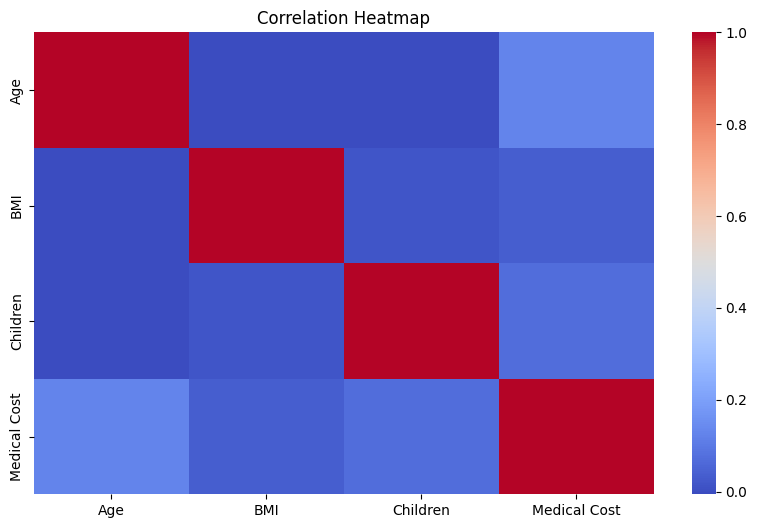

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

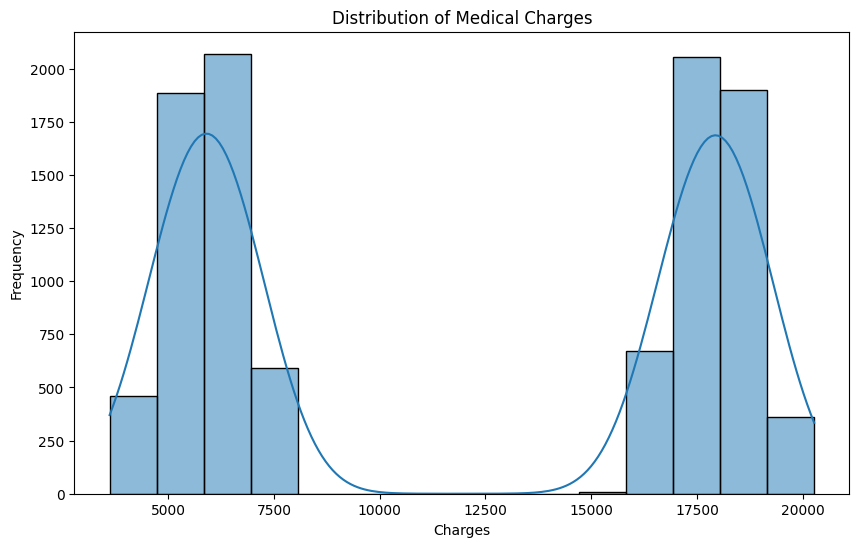

In [8]:
# Visualize charges distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Medical Cost'], kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Summary statistics
print(df.describe())


                Age          BMI      Children  Medical Cost
count  10000.000000  10000.00000  10000.000000  10000.000000
mean      41.678400     27.40301      2.501700  11898.932216
std       13.807724      7.22896      1.701672   6073.875834
min       18.000000     15.00000      0.000000   3617.090000
25%       30.000000     21.10000      1.000000   5909.925000
50%       42.000000     27.40000      2.000000   7957.430000
75%       54.000000     33.70000      4.000000  17931.962500
max       65.000000     40.00000      5.000000  20268.210000


## Data Preprocessing

In [10]:
# Encode categorical variables
df=pd.get_dummies(df,columns=['Sex','Smoker', 'Region',],drop_first=True,dtype=int)
df.head(2)

,Age,BMI,Children,Medical Cost,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,58,15.6,2,17907.54,1,1,1,0,0
1,24,29.8,0,16312.64,1,1,0,0,0


In [11]:
# Split into features and target
x=df.drop('Medical Cost',axis=1)
y=df['Medical Cost']

In [ ]:
x

,Age,BMI,Children,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,58,15.6,2,1,1,1,0,0
1,24,29.8,0,1,1,0,0,0
2,50,29.0,5,1,0,1,0,0
3,35,34.0,1,1,0,0,1,0
4,31,17.6,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...
9995,24,26.9,2,0,1,0,1,0
9996,49,33.4,3,0,0,0,0,0
9997,52,38.1,5,0,1,1,0,0
9998,24,33.4,4,1,0,1,0,0


In [12]:
y

,Medical Cost
0,17907.54
1,16312.64
2,6819.21
3,5247.87
4,17525.49
...,...
9995,16551.53
9996,6376.05
9997,18760.27
9998,5471.91


In [13]:
# Train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [14]:
x_train

,Age,BMI,Children,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
9254,34,35.0,5,1,0,0,0,0
1561,64,35.1,4,1,1,0,0,0
1670,34,21.7,5,1,1,0,1,0
6087,55,31.1,2,1,0,0,0,0
6669,38,38.1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
5734,25,24.8,3,0,1,1,0,0
5191,32,31.6,4,1,0,0,0,0
5390,43,19.9,4,0,0,0,0,1
860,19,16.4,4,1,1,0,0,0


In [15]:
x_test

,Age,BMI,Children,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
6252,18,23.3,3,1,0,0,0,1
4684,41,32.0,5,1,1,1,0,0
1731,51,35.7,5,0,1,0,0,0
4742,62,36.1,4,1,0,0,0,0
4521,63,19.4,4,0,1,0,1,0
...,...,...,...,...,...,...,...,...
6412,35,35.1,3,1,1,0,0,0
8285,20,31.2,2,1,0,0,1,0
7853,54,28.3,4,0,0,1,0,0
1095,50,17.1,2,1,0,0,1,0


In [16]:
# Feature scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Model Training with LinearRegression

In [17]:
# Train a linear regression model
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)


# Make predictions
y_pred=linear_model.predict(x_test)
# Evaluation metrics
print("R2 Score of linear model:",r2_score(y_test,y_pred))
print("MSE of linear model:",mean_squared_error(y_test,y_pred))
print("MAE of linear model:",mean_absolute_error(y_test,y_pred))


R2 Score of linear model: 0.997689685176468
MSE of linear model: 84926.73518794579
MAE of linear model: 252.93862320618547


## Vizualization

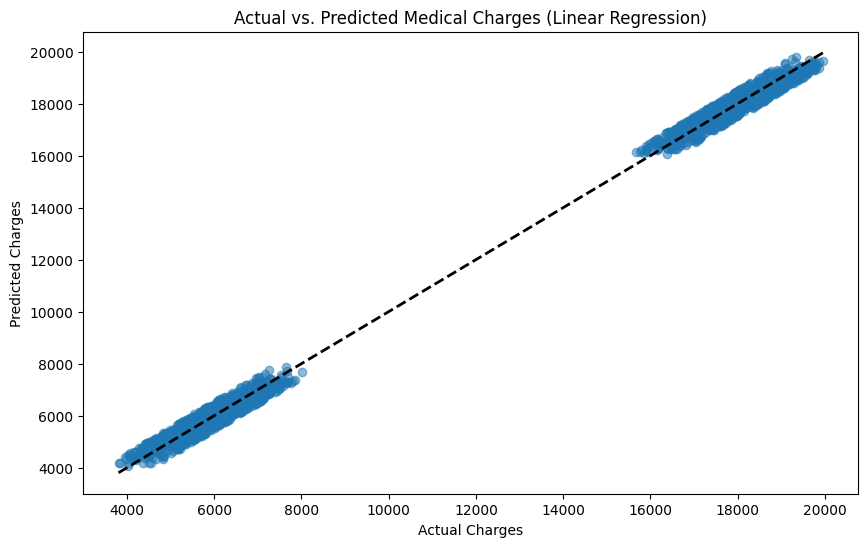

In [18]:
# Plot actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Medical Charges (Linear Regression)')
plt.show()

### Let's use more ***advanced*** models

# Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
model_tree=DecisionTreeRegressor()
model_tree.fit(x_train,y_train)
y_pred_tree=model_tree.predict(x_test)
print("R2 Score of Decision Tree model:",r2_score(y_test,y_pred_tree))
print("MSE of Decision Tree model:",mean_squared_error(y_test,y_pred_tree))
print("MAE of Decision Tree model:",mean_absolute_error(y_test,y_pred_tree))

R2 Score of Decision Tree model: 0.9950096913670674
MSE of Decision Tree model: 183442.7998549875
MAE of Decision Tree model: 349.4768125


# **K Neighbors Regressor**

In [20]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor()
model_knn.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)
print("R2 Score of KNN model:",r2_score(y_test,y_pred_knn))
print("MSE of KNN model:",mean_squared_error(y_test,y_pred_knn))
print("MAE of KNN model:",mean_absolute_error(y_test,y_pred_knn))

R2 Score of KNN model: 0.9969347790389927
MSE of KNN model: 112676.94177282405
MAE of KNN model: 278.86338600000005


# **SVR**

In [21]:
from sklearn.svm import SVR
model_svr=SVR()
model_svr.fit(x_train,y_train)
y_pred_svr=model_svr.predict(x_test)
print("R2 Score of SVR model:",r2_score(y_test,y_pred_svr))
print("MSE of SVR model:",mean_squared_error(y_test,y_pred_svr))
print("MAE of SVR model:",mean_absolute_error(y_test,y_pred_svr))

R2 Score of SVR model: -0.2803208877617607
MSE of SVR model: 47064353.25740934
MAE of SVR model: 5705.089494971486


# **Gradient Boosting Regressor**

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
model_boost=GradientBoostingRegressor()
model_boost.fit(x_train,y_train)
y_pred_boost=model_boost.predict(x_test)
print("R2 Score of Gradient Boosting model:",r2_score(y_test,y_pred_boost))
print("MSE of Gradient Boosting model:",mean_squared_error(y_test,y_pred_boost))
print("MAE of Gradient Boosting model:",mean_absolute_error(y_test,y_pred_boost))

R2 Score of Gradient Boosting model: 0.9976345703806294
MSE of Gradient Boosting model: 86952.74464061618
MAE of Gradient Boosting model: 254.9231943176451


# **Random Forest Regressor**

In [23]:
from sklearn.ensemble import RandomForestRegressor
model_forest=RandomForestRegressor(n_estimators=1000,random_state=42)
model_forest.fit(x_train,y_train)
y_pred_forest=model_forest.predict(x_test)
print("R2 Score of Random Forest model:",r2_score(y_test,y_pred_forest))
print("MSE of Random Forest model:",mean_squared_error(y_test,y_pred_forest))
print("MAE of Random Forest model:",mean_absolute_error(y_test,y_pred_forest))

R2 Score of Random Forest model: 0.9971532993194482
MSE of Random Forest model: 104644.17766534793
MAE of Random Forest model: 273.31853868803427


# **Bagging Regressor**

In [24]:
from sklearn.ensemble import BaggingRegressor
model_bag=BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=10,random_state=42)
model_bag.fit(x_train,y_train)
y_pred_bag=model_bag.predict(x_test)
print("R2 Score of Bagging model:",r2_score(y_test,y_pred_bag))
print("MSE of Bagging model:",mean_squared_error(y_test,y_pred_bag))
print("MAE of Bagging model:",mean_absolute_error(y_test,y_pred_bag))

R2 Score of Bagging model: 0.9969839395944405
MSE of Bagging model: 110869.80906879256
MAE of Bagging model: 279.6530019416666


# **XGB Regressor**

In [25]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)
print("R2 Score of XGBoost model:",r2_score(y_test,y_pred_xgb))
print("MSE of XGBoost model:",mean_squared_error(y_test,y_pred_xgb))
print("MAE of XGBoost model:",mean_absolute_error(y_test,y_pred_xgb))

R2 Score of XGBoost model: 0.997231446520766
MSE of XGBoost model: 101771.50135110726
MAE of XGBoost model: 269.89833250488283


Save the Model

In [26]:
import joblib

# Save
joblib.dump(model_xgb, 'medical_cost_pred_big_data_model.pkl')

from google.colab import files
files.download('medical_cost_pred_big_data_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>